In [3]:
import os, cv2, torch, numpy as np
from ultralytics import YOLO

#VERY FAST GEAVY RUN INFERENCE
# ---- config ----
home     = os.path.expanduser("~")
weights  = f"{home}/models/jakes-loped/jakes-finder-mk1/1/weights.pt"
RAIL_ID  = 9
ALPHA    = 0.4
IMG_SIZE = 512     # try 448–640 based on your accuracy/speed needs
CONF     = 0.30
IOU      = 0.45

# ---- device/precision ----
if torch.cuda.is_available():
    device, half = 0, True
elif getattr(torch.backends, "mps", None) and torch.backends.mps.is_available():
    device, half = "mps", False
else:
    device, half = "cpu", False

# ---- load once, fuse, warmup ----
model = YOLO(weights)
try: model.fuse()
except Exception: pass

dummy = np.zeros((IMG_SIZE, IMG_SIZE, 3), np.uint8)
_ = model.predict(dummy, task="segment", imgsz=IMG_SIZE, device=device,
                  conf=CONF, iou=IOU, classes=[RAIL_ID],
                  verbose=False, half=half)

# ---- fast per-frame function ----
def process_frame(img_bgr):
    res = model.predict(img_bgr, task="segment", imgsz=IMG_SIZE, device=device,
                        conf=CONF, iou=IOU, classes=[RAIL_ID],
                        max_det=20, verbose=False, half=half)[0]

    if res.masks is None or res.boxes is None or len(res.boxes) == 0:
        return img_bgr  # no rails

    # Union rail masks
    m = res.masks.data                    # [N, h_m, w_m] tensor (model mask size)
    union = (m.sum(dim=0) > 0).float().cpu().numpy()  # [h_m, w_m] in {0,1}

    # --- ensure mask matches frame size ---
    H, W = img_bgr.shape[:2]
    if union.shape != (H, W):
        union = cv2.resize(union, (W, H), interpolation=cv2.INTER_NEAREST)
    mask = union.astype(bool)

    # --- fast masked blend ---
    overlay = img_bgr.copy()
    overlay[mask] = (0, 0, 255)  # BGR rail color
    out = cv2.addWeighted(overlay, ALPHA, img_bgr, 1 - ALPHA, 0)
    return out


# ---- example: directory poll (replace with your frame source) ----
if __name__ == "__main__":
    import glob, time
    image_dir = f"{home}/SubwaySurfers/train_screenshots"
    seen = set()
    while True:
        for p in sorted(glob.glob(os.path.join(image_dir, "frame_*.jpg"))):
            if p in seen: continue
            img = cv2.imread(p)
            if img is None: continue
            out = process_frame(img)
            cv2.imshow("rails", out)
            cv2.waitKey(1)
            seen.add(p)
        time.sleep(0.02)


YOLO11n-seg summary (fused): 113 layers, 2,836,908 parameters, 0 gradients, 10.2 GFLOPs


2025-08-04 17:09:33.847 Python[21199:28415166] +[IMKClient subclass]: chose IMKClient_Legacy
2025-08-04 17:09:33.847 Python[21199:28415166] +[IMKInputSession subclass]: chose IMKInputSession_Legacy


KeyboardInterrupt: 

In [13]:
import os, cv2, torch, numpy as np
from ultralytics import YOLO

#VERY FAST GEAVY RUN INFERENCE
# ---- config ----
home     = os.path.expanduser("~")
weights  = f"{home}/models/jakes-loped/jakes-finder-mk1/1/weights.pt"
RAIL_ID  = 9
ALPHA    = 0.4
IMG_SIZE = 512     # try 448–640 based on your accuracy/speed needs
CONF     = 0.30
IOU      = 0.45

# ---- device/precision ----
if torch.cuda.is_available():
    device, half = 0, True
elif getattr(torch.backends, "mps", None) and torch.backends.mps.is_available():
    device, half = "mps", False
else:
    device, half = "cpu", False

# ---- load once, fuse, warmup ----
model = YOLO(weights)
try: model.fuse()
except Exception: pass

dummy = np.zeros((IMG_SIZE, IMG_SIZE, 3), np.uint8)
_ = model.predict(dummy, task="segment", imgsz=IMG_SIZE, device=device,
                  conf=CONF, iou=IOU, classes=[RAIL_ID],
                  verbose=False, half=half)

# ---- fast per-frame function ----
def process_frame(img_bgr):
    res = model.predict(img_bgr, task="segment", imgsz=IMG_SIZE, device=device,
                        conf=CONF, iou=IOU, classes=[RAIL_ID],
                        max_det=20, verbose=False, half=half)[0]

    if res.masks is None or res.boxes is None or len(res.boxes) == 0:
        return img_bgr  # no rails

    # Union rail masks
    m = res.masks.data                    # [N, h_m, w_m] tensor (model mask size)
    union = (m.sum(dim=0) > 0).float().cpu().numpy()  # [h_m, w_m] in {0,1}

    # --- ensure mask matches frame size ---
    H, W = img_bgr.shape[:2]
    if union.shape != (H, W):
        union = cv2.resize(union, (W, H), interpolation=cv2.INTER_NEAREST)
    mask = union.astype(bool)

    # --- fast masked blend ---
    overlay = img_bgr.copy()
    overlay[mask] = (0, 0, 255)  # BGR rail color
    out = cv2.addWeighted(overlay, ALPHA, img_bgr, 1 - ALPHA, 0)
    return out


# ---- example: directory poll (replace with your frame source) ----
if __name__ == "__main__":
    import glob, time
    image_dir = f"{home}/SubwaySurfers/train_screenshots"
    seen = set()
    while True:
        for p in sorted(glob.glob(os.path.join(image_dir, "frame_*.jpg"))):
            time.sleep(1.0)
            if p in seen: continue
            img = cv2.imread(p)
            if img is None: continue
            out = process_frame(img)
            cv2.imshow("rails", out)
            cv2.waitKey(1)
            seen.add(p)
        time.sleep(0.02)


YOLO11n-seg summary (fused): 113 layers, 2,836,908 parameters, 0 gradients, 10.2 GFLOPs


KeyboardInterrupt: 

In [ ]:
#!/usr/bin/env python3
import os, glob, time
import cv2, torch, numpy as np
from ultralytics import YOLO

# ---- CONFIG ----
home     = os.path.expanduser("~")
weights  = f"{home}/models/jakes-loped/jakes-finder-mk1/1/weights.pt"
RAIL_ID  = 9
ALPHA    = 0.4
IMG_SIZE = 512     # try 448–640 based on your accuracy/speed needs
CONF     = 0.30
IOU      = 0.45

# ---- color-filter params ----
TARGET_COLORS_RGB = [(119,104,67), (81,42,45)]
TOLERANCE         = 30.0
MIN_REGION_SIZE   = 50
MIN_REGION_HEIGHT = 150

# ---- device/precision ----
if torch.cuda.is_available():
    device, half = 0, True
elif getattr(torch.backends, "mps", None) and torch.backends.mps.is_available():
    device, half = "mps", False
else:
    device, half = "cpu", False

# ---- load once, fuse, warmup ----
model = YOLO(weights)
try:
    model.fuse()
except Exception:
    pass

dummy = np.zeros((IMG_SIZE, IMG_SIZE, 3), np.uint8)
_ = model.predict(
    dummy, task="segment", imgsz=IMG_SIZE, device=device,
    conf=CONF, iou=IOU, classes=[RAIL_ID],
    verbose=False, half=half
)

def filter_mask_by_color_and_size(
    img: np.ndarray,
    rail_mask: np.ndarray,
    target_colors_rgb: list[tuple[int,int,int]],
    tolerance: float = 20.0,
    min_region_size: int = 50,
    min_region_height: int = 150
) -> np.ndarray:
    """
    1) Color‐match pixels within `tolerance` of any `target_colors_rgb`
    2) Intersect with `rail_mask`
    3) Keep only connected components ≥ min_region_size & ≥ min_region_height
    """
    img_f = img.astype(np.float32)
    targets_bgr = [(b,g,r) for (r,g,b) in target_colors_rgb]
    color_mask = np.zeros(img.shape[:2], dtype=bool)

    for tb in targets_bgr:
        tb_arr = np.array(tb, dtype=np.float32).reshape((1,1,3))
        dist = np.linalg.norm(img_f - tb_arr, axis=2)
        color_mask |= (dist <= tolerance)

    combined = rail_mask & color_mask
    comp_uint8 = combined.astype(np.uint8)

    n_labels, labels, stats, _ = cv2.connectedComponentsWithStats(comp_uint8, 8)
    filtered = np.zeros_like(combined)
    for lbl in range(1, n_labels):
        area   = stats[lbl, cv2.CC_STAT_AREA]
        height = stats[lbl, cv2.CC_STAT_HEIGHT]
        if area >= min_region_size and height >= min_region_height:
            filtered[labels == lbl] = True

    return filtered

def process_frame(img_bgr):
    # 1) Raw segmentation mask
    res = model.predict(
        img_bgr, task="segment", imgsz=IMG_SIZE, device=device,
        conf=CONF, iou=IOU, classes=[RAIL_ID],
        max_det=20, verbose=False, half=half
    )[0]

    if res.masks is None:
        return img_bgr  # no rails detected

    # 2) Union all rail masks into one boolean mask
    m = res.masks.data               # [N, h_m, w_m]
    union = (m.sum(dim=0) > 0).float().cpu().numpy()
    H, W = img_bgr.shape[:2]
    if union.shape != (H, W):
        union = cv2.resize(union, (W, H), interpolation=cv2.INTER_NEAREST)
    raw_mask = union.astype(bool)

    # 3) Apply color+size filtering
    filtered_mask = filter_mask_by_color_and_size(
        img_bgr,
        raw_mask,
        TARGET_COLORS_RGB,
        tolerance=TOLERANCE,
        min_region_size=MIN_REGION_SIZE,
        min_region_height=MIN_REGION_HEIGHT
    )

    # 4) Blend overlay only on filtered rails
    overlay = img_bgr.copy()
    overlay[filtered_mask] = (0, 0, 255)        # BGR rail highlight
    out = cv2.addWeighted(overlay, ALPHA, img_bgr, 1 - ALPHA, 0)

    return out

# ---- example: directory poll (replace with your frame source) ----
if __name__ == "__main__":
    image_dir = f"{home}/SubwaySurfers/train_screenshots"
    seen = set()
    while True:
        for p in sorted(glob.glob(os.path.join(image_dir, "frame_*.jpg"))):
            time.sleep(3.0)
            if p in seen:
                continue
            img = cv2.imread(p)
            if img is None:
                continue
            out = process_frame(img)
            cv2.imshow("rails", out)
            if cv2.waitKey(1) == ord('q'):
                sys.exit(0)
            seen.add(p)
        time.sleep(0.02)


YOLO11n-seg summary (fused): 113 layers, 2,836,908 parameters, 0 gradients, 10.2 GFLOPs


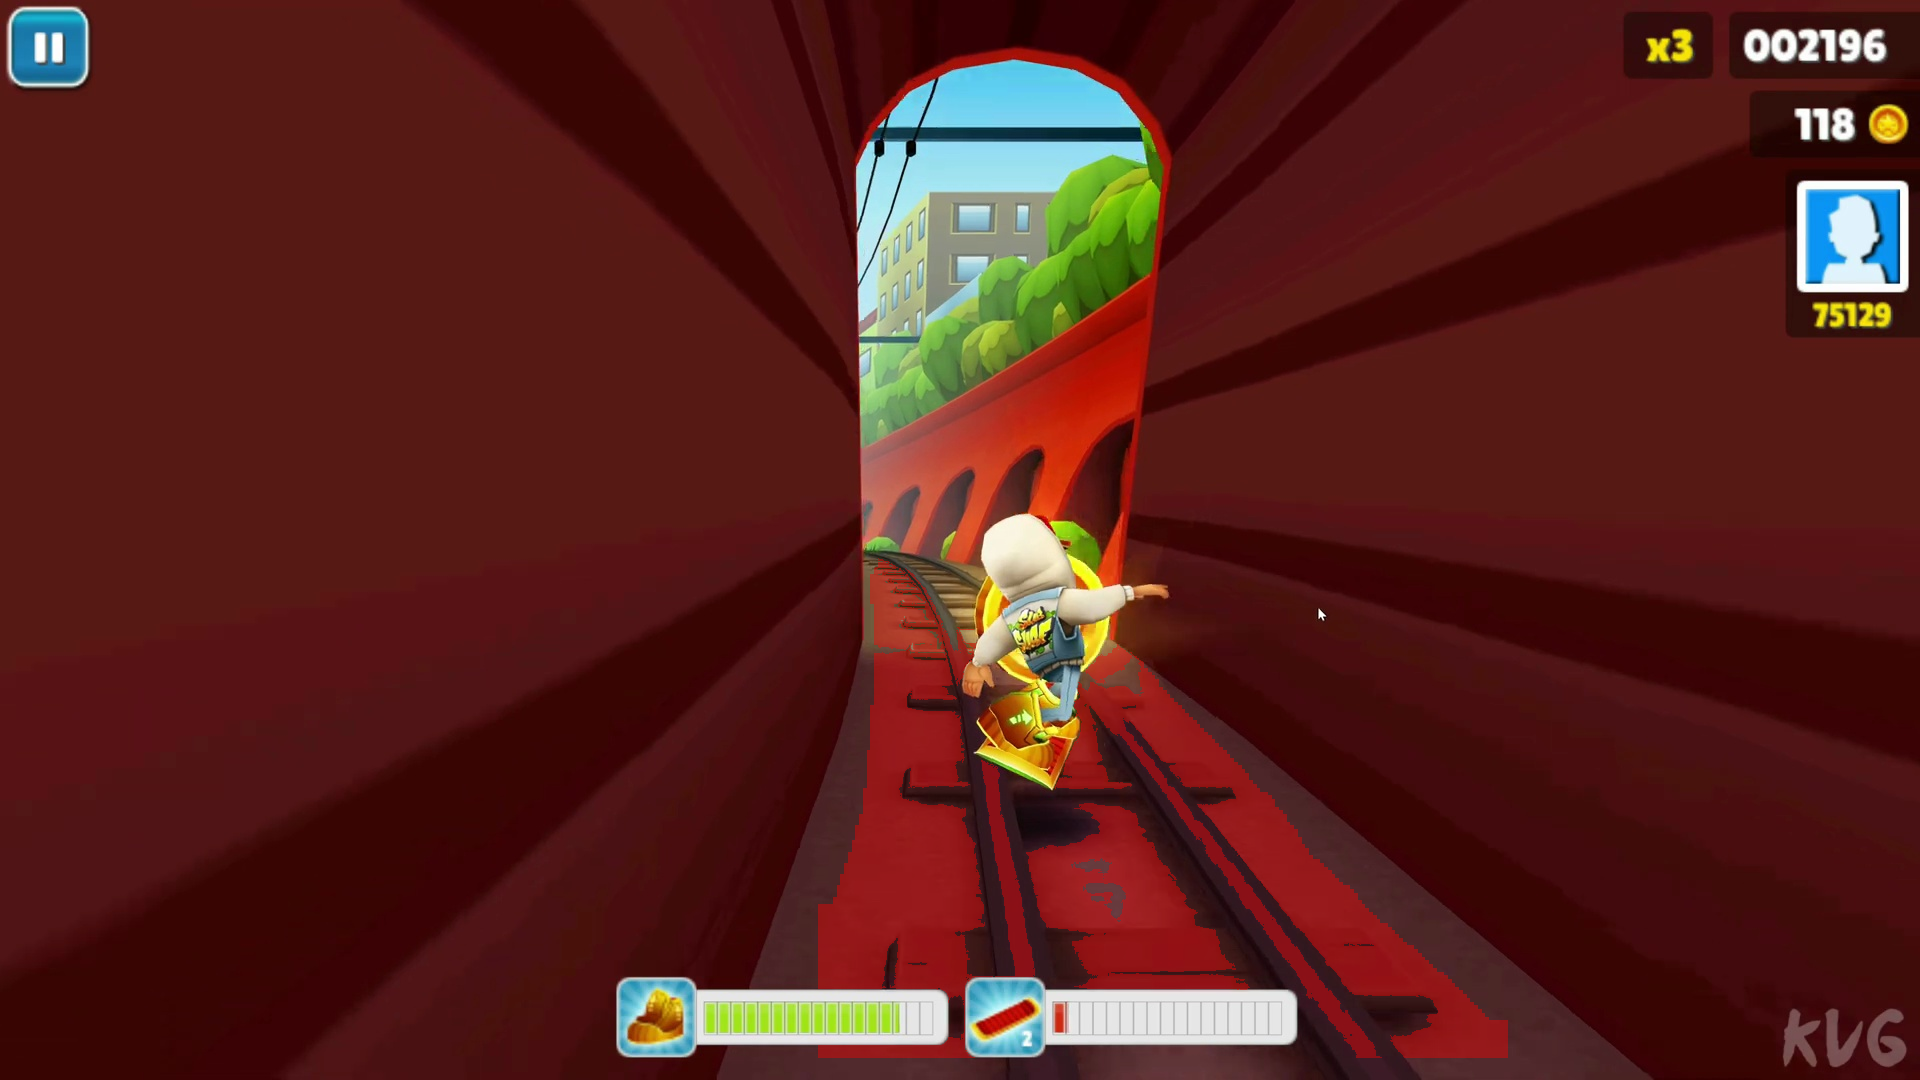

KeyboardInterrupt: 

In [2]:
#!/usr/bin/env python3
import os, glob, time
import cv2, torch, numpy as np
from ultralytics import YOLO
from IPython.display import display, clear_output
from PIL import Image

# ---- CONFIG ----
home     = os.path.expanduser("~")
weights  = f"{home}/models/jakes-loped/jakes-finder-mk1/1/weights.pt"
RAIL_ID  = 9
ALPHA    = 0.4
IMG_SIZE = 512     # try 448–640 based on your accuracy/speed needs
CONF     = 0.30
IOU      = 0.45

# ---- color-filter params ----
TARGET_COLORS_RGB = [(119,104,67), (81,42,45)]
TOLERANCE         = 30.0
MIN_REGION_SIZE   = 100
MIN_REGION_HEIGHT = 150

# ---- device/precision ----
if torch.cuda.is_available():
    device, half = 0, True
elif getattr(torch.backends, "mps", None) and torch.backends.mps.is_available():
    device, half = "mps", False
else:
    device, half = "cpu", False

# ---- load once, fuse, warmup ----
model = YOLO(weights)
try:
    model.fuse()
except:
    pass

dummy = np.zeros((IMG_SIZE, IMG_SIZE, 3), np.uint8)
_ = model.predict(
    dummy, task="segment", imgsz=IMG_SIZE, device=device,
    conf=CONF, iou=IOU, classes=[RAIL_ID],
    verbose=False, half=half
)

def filter_mask_by_color_and_size(
    img: np.ndarray,
    rail_mask: np.ndarray,
    target_colors_rgb: list[tuple[int,int,int]],
    tolerance: float = 20.0,
    min_region_size: int = 50,
    min_region_height: int = 150
) -> np.ndarray:
    img_f = img.astype(np.float32)
    targets_bgr = [(b,g,r) for (r,g,b) in target_colors_rgb]
    color_mask = np.zeros(img.shape[:2], dtype=bool)
    for tb in targets_bgr:
        tb_arr = np.array(tb, dtype=np.float32).reshape((1,1,3))
        dist = np.linalg.norm(img_f - tb_arr, axis=2)
        color_mask |= (dist <= tolerance)
    combined = rail_mask & color_mask
    comp_uint8 = combined.astype(np.uint8)
    n_labels, labels, stats, _ = cv2.connectedComponentsWithStats(comp_uint8, 8)
    filtered = np.zeros_like(combined)
    for lbl in range(1, n_labels):
        area   = stats[lbl, cv2.CC_STAT_AREA]
        height = stats[lbl, cv2.CC_STAT_HEIGHT]
        if area >= min_region_size and height >= min_region_height:
            filtered[labels == lbl] = True
    return filtered

def process_frame(img_bgr):
    # 1) Raw segmentation mask
    res = model.predict(
        img_bgr, task="segment", imgsz=IMG_SIZE, device=device,
        conf=CONF, iou=IOU, classes=[RAIL_ID],
        max_det=20, verbose=False, half=half
    )[0]
    if res.masks is None:
        return img_bgr

    # 2) Union all rail masks into one boolean mask
    m = res.masks.data
    union = (m.sum(dim=0) > 0).float().cpu().numpy()
    H, W = img_bgr.shape[:2]
    if union.shape != (H, W):
        union = cv2.resize(union, (W, H), interpolation=cv2.INTER_NEAREST)
    raw_mask = union.astype(bool)

    # 3) Apply color+size filtering
    filtered_mask = filter_mask_by_color_and_size(
        img_bgr,
        raw_mask,
        TARGET_COLORS_RGB,
        tolerance=TOLERANCE,
        min_region_size=MIN_REGION_SIZE,
        min_region_height=MIN_REGION_HEIGHT
    )

    # 4) Blend overlay only on filtered rails
    overlay = img_bgr.copy()
    overlay[filtered_mask] = (0, 0, 255)
    out = cv2.addWeighted(overlay, ALPHA, img_bgr, 1 - ALPHA, 0)
    return out

# ---- notebook‐friendly display loop ----
if __name__ == "__main__":
    image_dir = f"{home}/SubwaySurfers/train_screenshots"
    seen = set()
    while True:
        for p in sorted(glob.glob(os.path.join(image_dir, "frame_*.jpg"))):
            if p in seen:
                continue
            img = cv2.imread(p)
            if img is None:
                continue

            out = process_frame(img)

            # --- display inline in Jupyter ---
            clear_output(wait=True)
            # convert BGR → RGB and show
            rgb = cv2.cvtColor(out, cv2.COLOR_BGR2RGB)
            display(Image.fromarray(rgb))

            seen.add(p)
            time.sleep(0.0)  # adjust playback speed here

        time.sleep(0.02)


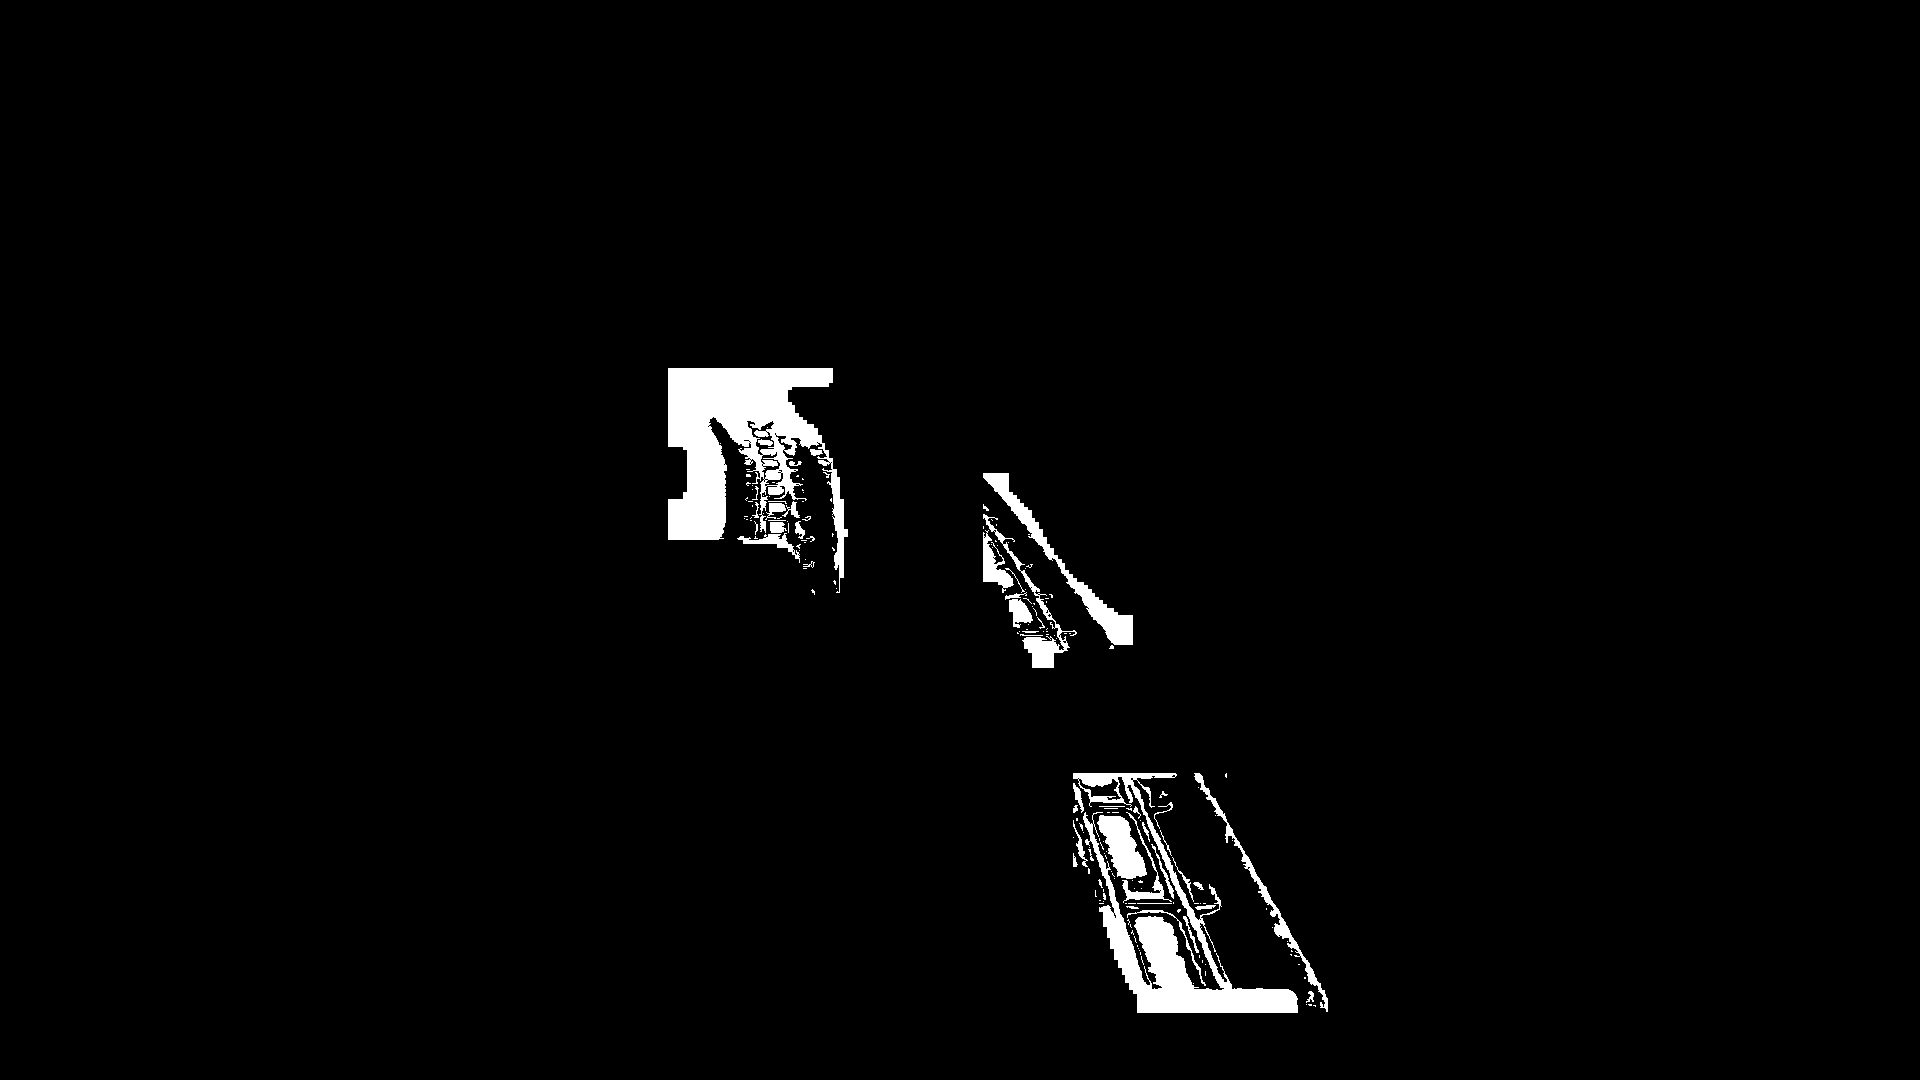

KeyboardInterrupt: 

In [15]:
#!/usr/bin/env python3
import os
import glob
import time
import cv2
import torch
import numpy as np
from ultralytics import YOLO
from IPython.display import display, clear_output
from PIL import Image

# ---- CONFIG ----
home     = os.path.expanduser("~")
weights  = f"{home}/models/jakes-loped/jakes-finder-mk1/1/weights.pt"
RAIL_ID  = 9
IMG_SIZE = 512     # try 448–640 based on your accuracy/speed needs
CONF     = 0.30
IOU      = 0.45

# ---- color‐filter params ----
TARGET_COLORS_RGB = [(119,104,67), (81,42,45)]
TOLERANCE         = 30.0
MIN_REGION_SIZE   = 100
MIN_REGION_HEIGHT = 150

# ---- device/precision ----
if torch.cuda.is_available():
    device, half = 0, True
elif getattr(torch.backends, "mps", None) and torch.backends.mps.is_available():
    device, half = "mps", False
else:
    device, half = "cpu", False

# ---- load & warm-up YOLO once ----
model = YOLO(weights)
try:
    model.fuse()
except:
    pass

_dummy = np.zeros((IMG_SIZE, IMG_SIZE, 3), np.uint8)
_ = model.predict(
    _dummy, task="segment", imgsz=IMG_SIZE, device=device,
    conf=CONF, iou=IOU, classes=[RAIL_ID],
    verbose=False, half=half
)

def filter_mask_by_color_and_size(
    img: np.ndarray,
    rail_mask: np.ndarray,
    target_colors_rgb: list[tuple[int,int,int]],
    tolerance: float = 20.0,
    min_region_size: int = 50,
    min_region_height: int = 150
) -> np.ndarray:
    img_f = img.astype(np.float32)
    targets_bgr = [(b,g,r) for (r,g,b) in target_colors_rgb]
    color_mask = np.zeros(img.shape[:2], dtype=bool)
    for tb in targets_bgr:
        tb_arr = np.array(tb, dtype=np.float32).reshape((1,1,3))
        dist = np.linalg.norm(img_f - tb_arr, axis=2)
        color_mask |= (dist <= tolerance)
    combined = rail_mask & color_mask
    comp_uint8 = combined.astype(np.uint8)
    n_labels, labels, stats, _ = cv2.connectedComponentsWithStats(comp_uint8, 8)
    filtered = np.zeros_like(combined)
    for lbl in range(1, n_labels):
        area   = stats[lbl, cv2.CC_STAT_AREA]
        height = stats[lbl, cv2.CC_STAT_HEIGHT]
        if area >= min_region_size and height >= min_region_height:
            filtered[labels == lbl] = True
    return filtered

def get_rail_mask(img: np.ndarray) -> np.ndarray:
    """
    Run YOLO segmentation and return a boolean mask of rails.
    """
    res = model.predict(
        img, task="segment", imgsz=IMG_SIZE, device=device,
        conf=CONF, iou=IOU, classes=[RAIL_ID],
        max_det=20, verbose=False, half=half
    )[0]
    if res.masks is None:
        return np.zeros(img.shape[:2], dtype=bool)
    m = res.masks.data.sum(dim=0).cpu().numpy()
    uni = (m > 0).astype(np.uint8)
    H, W = img.shape[:2]
    if uni.shape != (H, W):
        uni = cv2.resize(uni, (W, H), interpolation=cv2.INTER_NEAREST)
    return uni.astype(bool)

def process_frame(img_bgr: np.ndarray) -> np.ndarray:
    # 1) get raw rail mask
    raw_mask = get_rail_mask(img_bgr)

    # 2) filter it by color + size
    filtered_mask = filter_mask_by_color_and_size(
        img_bgr,
        raw_mask,
        TARGET_COLORS_RGB,
        tolerance=TOLERANCE,
        min_region_size=MIN_REGION_SIZE,
        min_region_height=MIN_REGION_HEIGHT
    )

    # 3) compute the “gap” mask: inside rail region but not in filtered subset
    gap_mask = raw_mask & (~filtered_mask)

    # 4) build output: black everywhere, white in those gaps
    out = np.zeros_like(img_bgr, dtype=np.uint8)
    out[gap_mask] = (255,255,255)

    return out

# ---- notebook-friendly display loop ----
if __name__ == "__main__":
    image_dir = f"{home}/SubwaySurfers/train_screenshots"
    seen = set()

    while True:
        for path in sorted(glob.glob(os.path.join(image_dir, "frame_*.jpg"))):
            if path in seen:
                continue
            img = cv2.imread(path)
            if img is None:
                continue

            out = process_frame(img)

            # display inline: everything black except the square-like gaps
            clear_output(wait=True)
            display(Image.fromarray(cv2.cvtColor(out, cv2.COLOR_BGR2RGB)))

            seen.add(path)
            time.sleep(4)   # adjust playback speed

        time.sleep(0.02)


In [ ]:
#!/usr/bin/env python3
import os
import glob
import sys
import cv2
import torch
import numpy as np
from ultralytics import YOLO

# ---- CONFIG ----
home     = os.path.expanduser("~")
weights  = f"{home}/models/jakes-loped/jakes-finder-mk1/1/weights.pt"
RAIL_ID  = 9
IMG_SIZE = 512     # try 448–640 based on your accuracy/speed needs
CONF     = 0.30
IOU      = 0.45

# ---- color‐filter params ----
TARGET_COLORS_RGB = [(119,104,67), (81,42,45), (51,43,38)]
TOLERANCE         = 25.0
MIN_REGION_SIZE   = 100
MIN_REGION_HEIGHT = 150

# ---- device/precision ----
if torch.cuda.is_available():
    device, half = 0, True
elif getattr(torch.backends, "mps", None) and torch.backends.mps.is_available():
    device, half = "mps", False
else:
    device, half = "cpu", False

# ---- load & warm-up YOLO once ----
model = YOLO(weights)
try:
    model.fuse()
except:
    pass

_dummy = np.zeros((IMG_SIZE, IMG_SIZE, 3), np.uint8)
_ = model.predict(
    _dummy, task="segment", imgsz=IMG_SIZE,
    device=device, conf=CONF, iou=IOU,
    classes=[RAIL_ID], verbose=False, half=half
)

def get_rail_mask(img: np.ndarray) -> np.ndarray:
    """Run YOLO segmentation and return a boolean mask of rails."""
    res = model.predict(
        img, task="segment", imgsz=IMG_SIZE,
        device=device, conf=CONF, iou=IOU,
        classes=[RAIL_ID], max_det=20,
        verbose=False, half=half
    )[0]
    if res.masks is None:
        return np.zeros(img.shape[:2], dtype=bool)
    m = res.masks.data.sum(dim=0).cpu().numpy()
    uni = (m > 0).astype(np.uint8)
    H, W = img.shape[:2]
    if uni.shape != (H, W):
        uni = cv2.resize(uni, (W, H), interpolation=cv2.INTER_NEAREST)
    return uni.astype(bool)

def filter_mask_by_color_and_size(
    img: np.ndarray,
    rail_mask: np.ndarray,
    target_colors_rgb: list[tuple[int,int,int]],
    tolerance: float = 20.0,
    min_region_size: int = 50,
    min_region_height: int = 150
) -> np.ndarray:
    """Keep only those rail-mask pixels matching the target colors & sizes."""
    img_f = img.astype(np.float32)
    targets_bgr = [(b,g,r) for (r,g,b) in target_colors_rgb]
    color_mask = np.zeros(img.shape[:2], dtype=bool)
    for tb in targets_bgr:
        tb_arr = np.array(tb, dtype=np.float32).reshape((1,1,3))
        dist = np.linalg.norm(img_f - tb_arr, axis=2)
        color_mask |= (dist <= tolerance)
    combined = rail_mask & color_mask
    comp_uint8 = combined.astype(np.uint8)
    n_labels, labels, stats, _ = cv2.connectedComponentsWithStats(comp_uint8, 8)
    filtered = np.zeros_like(combined)
    for lbl in range(1, n_labels):
        area   = stats[lbl, cv2.CC_STAT_AREA]
        height = stats[lbl, cv2.CC_STAT_HEIGHT]
        if area >= min_region_size and height >= min_region_height:
            filtered[labels == lbl] = True
    return filtered

def process_frame(img_bgr: np.ndarray) -> np.ndarray:
    """
    Returns a BGR image where:
      - everything is black except
      - white (255,255,255) in the gaps between rails
        (i.e. inside the rail mask but not in the color-filtered subset)
    """
    raw_mask = get_rail_mask(img_bgr)
    filtered = filter_mask_by_color_and_size(
        img_bgr,
        raw_mask,
        TARGET_COLORS_RGB,
        tolerance=TOLERANCE,
        min_region_size=MIN_REGION_SIZE,
        min_region_height=MIN_REGION_HEIGHT
    )
    gap_mask = raw_mask & (~filtered)

    out = np.zeros_like(img_bgr)
    out[gap_mask] = (255,255,255)
    return out

if __name__ == "__main__":
    image_dir = f"{home}/SubwaySurfers/train_screenshots"
    paths = sorted(glob.glob(os.path.join(image_dir, "frame_*.jpg")))
    if not paths:
        print("No frames found in", image_dir)
        sys.exit(1)

    for path in paths:
        img = cv2.imread(path)
        if img is None:
            continue

        filtered_vis = process_frame(img)

        # build a horizontal split-screen: left=original, right=filtered
        combo = np.hstack((img, filtered_vis))

        cv2.imshow("Original (Left) | Gaps (Right)", combo)
        while True:
            key = cv2.waitKey(0) & 0xFF
            if key == 32:       # spacebar → next image
                break
            elif key == ord('q'):  # 'q' → quit
                cv2.destroyAllWindows()
                sys.exit(0)
        cv2.destroyAllWindows()


YOLO11n-seg summary (fused): 113 layers, 2,836,908 parameters, 0 gradients, 10.2 GFLOPs


2025-08-04 16:47:31.344 Python[20111:28390683] +[IMKClient subclass]: chose IMKClient_Legacy
2025-08-04 16:47:31.344 Python[20111:28390683] +[IMKInputSession subclass]: chose IMKInputSession_Legacy


In [ ]:
#Changing colour params

In [ ]:
#!/usr/bin/env python3
import os
import glob
import sys
import cv2
import torch
import numpy as np
from ultralytics import YOLO

# ---- CONFIG ----
home     = os.path.expanduser("~")
weights  = f"{home}/models/jakes-loped/jakes-finder-mk1/1/weights.pt"
RAIL_ID  = 9
IMG_SIZE = 512     # try 448–640 based on your accuracy/speed needs
CONF     = 0.30
IOU      = 0.45

# ---- color‐filter params ----
TARGET_COLORS_RGB = [(72,64,53)]
TOLERANCE         = 30.0
MIN_REGION_SIZE   = 300
MIN_REGION_HEIGHT = 150

# ---- device/precision ----
if torch.cuda.is_available():
    device, half = 0, True
elif getattr(torch.backends, "mps", None) and torch.backends.mps.is_available():
    device, half = "mps", False
else:
    device, half = "cpu", False

# ---- load & warm-up YOLO once ----
model = YOLO(weights)
try:
    model.fuse()
except:
    pass

_dummy = np.zeros((IMG_SIZE, IMG_SIZE, 3), np.uint8)
_ = model.predict(
    _dummy, task="segment", imgsz=IMG_SIZE,
    device=device, conf=CONF, iou=IOU,
    classes=[RAIL_ID], verbose=False, half=half
)

def get_rail_mask(img: np.ndarray) -> np.ndarray:
    """Run YOLO segmentation and return a boolean mask of rails."""
    res = model.predict(
        img, task="segment", imgsz=IMG_SIZE,
        device=device, conf=CONF, iou=IOU,
        classes=[RAIL_ID], max_det=20,
        verbose=False, half=half
    )[0]
    if res.masks is None:
        return np.zeros(img.shape[:2], dtype=bool)
    m = res.masks.data.sum(dim=0).cpu().numpy()
    uni = (m > 0).astype(np.uint8)
    H, W = img.shape[:2]
    if uni.shape != (H, W):
        uni = cv2.resize(uni, (W, H), interpolation=cv2.INTER_NEAREST)
    return uni.astype(bool)

def filter_mask_by_color_and_size(
    img: np.ndarray,
    rail_mask: np.ndarray,
    target_colors_rgb: list[tuple[int,int,int]],
    tolerance: float = 20.0,
    min_region_size: int = 50,
    min_region_height: int = 150
) -> np.ndarray:
    """Keep only those rail-mask pixels matching the target colors & sizes."""
    img_f = img.astype(np.float32)
    targets_bgr = [(b,g,r) for (r,g,b) in target_colors_rgb]
    color_mask = np.zeros(img.shape[:2], dtype=bool)
    for tb in targets_bgr:
        tb_arr = np.array(tb, dtype=np.float32).reshape((1,1,3))
        dist = np.linalg.norm(img_f - tb_arr, axis=2)
        color_mask |= (dist <= tolerance)
    combined = rail_mask & color_mask
    comp_uint8 = combined.astype(np.uint8)
    n_labels, labels, stats, _ = cv2.connectedComponentsWithStats(comp_uint8, 8)
    filtered = np.zeros_like(combined)
    for lbl in range(1, n_labels):
        area   = stats[lbl, cv2.CC_STAT_AREA]
        height = stats[lbl, cv2.CC_STAT_HEIGHT]
        if area >= min_region_size and height >= min_region_height:
            filtered[labels == lbl] = True
    return filtered

def process_frame(img_bgr: np.ndarray) -> np.ndarray:
    """
    Returns a BGR image where:
      - everything is black except
      - white (255,255,255) in the gaps between rails
        (i.e. inside the rail mask but not in the color-filtered subset)
    """
    raw_mask = get_rail_mask(img_bgr)
    filtered = filter_mask_by_color_and_size(
        img_bgr,
        raw_mask,
        TARGET_COLORS_RGB,
        tolerance=TOLERANCE,
        min_region_size=MIN_REGION_SIZE,
        min_region_height=MIN_REGION_HEIGHT
    )
    gap_mask = raw_mask & (~filtered)

    out = np.zeros_like(img_bgr)
    out[gap_mask] = (255,255,255)
    return out

if __name__ == "__main__":
    image_dir = f"{home}/SubwaySurfers/train_screenshots"
    paths = sorted(glob.glob(os.path.join(image_dir, "frame_*.jpg")))
    if not paths:
        print("No frames found in", image_dir)
        sys.exit(1)

    for path in paths:
        img = cv2.imread(path)
        if img is None:
            continue

        filtered_vis = process_frame(img)

        # build a horizontal split-screen: left=original, right=filtered
        combo = np.hstack((img, filtered_vis))

        cv2.imshow("Original (Left) | Gaps (Right)", combo)
        while True:
            key = cv2.waitKey(0) & 0xFF
            if key == 32:       # spacebar → next image
                break
            elif key == ord('q'):  # 'q' → quit
                cv2.destroyAllWindows()
                sys.exit(0)
        cv2.destroyAllWindows()


YOLO11n-seg summary (fused): 113 layers, 2,836,908 parameters, 0 gradients, 10.2 GFLOPs


2025-08-04 16:23:45.305 Python[18976:28364580] +[IMKClient subclass]: chose IMKClient_Legacy
2025-08-04 16:23:45.305 Python[18976:28364580] +[IMKInputSession subclass]: chose IMKInputSession_Legacy


In [ ]:
#Boost min area

In [ ]:
#!/usr/bin/env python3
import os
import glob
import sys
import cv2
import torch
import numpy as np
from ultralytics import YOLO

# ---- CONFIG ----
home     = os.path.expanduser("~")
weights  = f"{home}/models/jakes-loped/jakes-finder-mk1/1/weights.pt"
RAIL_ID  = 9
IMG_SIZE = 512     # try 448–640 based on your accuracy/speed needs
CONF     = 0.20
IOU      = 0.85

# ---- color‐filter params ----
TARGET_COLORS_RGB = [(119,104,67), (81,42,45), (51,43,38)]
TOLERANCE         = 25.0
MIN_REGION_SIZE   = 150
MIN_REGION_HEIGHT = 150

# ---- device/precision ----
if torch.cuda.is_available():
    device, half = 0, True
elif getattr(torch.backends, "mps", None) and torch.backends.mps.is_available():
    device, half = "mps", False
else:
    device, half = "cpu", False

# ---- load & warm-up YOLO once ----
model = YOLO(weights)
try:
    model.fuse()
except:
    pass

_dummy = np.zeros((IMG_SIZE, IMG_SIZE, 3), np.uint8)
_ = model.predict(
    _dummy, task="segment", imgsz=IMG_SIZE,
    device=device, conf=CONF, iou=IOU,
    classes=[RAIL_ID], verbose=False, half=half
)

def get_rail_mask(img: np.ndarray) -> np.ndarray:
    """Run YOLO segmentation and return a boolean mask of rails."""
    res = model.predict(
        img, task="segment", imgsz=IMG_SIZE,
        device=device, conf=CONF, iou=IOU,
        classes=[RAIL_ID], max_det=20,
        verbose=False, half=half
    )[0]
    if res.masks is None:
        return np.zeros(img.shape[:2], dtype=bool)
    m = res.masks.data.sum(dim=0).cpu().numpy()
    uni = (m > 0).astype(np.uint8)
    H, W = img.shape[:2]
    if uni.shape != (H, W):
        uni = cv2.resize(uni, (W, H), interpolation=cv2.INTER_NEAREST)
    return uni.astype(bool)

def filter_mask_by_color_and_size(
    img: np.ndarray,
    rail_mask: np.ndarray,
    target_colors_rgb: list[tuple[int,int,int]],
    tolerance: float = 20.0,
    min_region_size: int = 50,
    min_region_height: int = 150
) -> np.ndarray:
    """Keep only those rail-mask pixels matching the target colors & sizes."""
    img_f = img.astype(np.float32)
    targets_bgr = [(b,g,r) for (r,g,b) in target_colors_rgb]
    color_mask = np.zeros(img.shape[:2], dtype=bool)
    for tb in targets_bgr:
        tb_arr = np.array(tb, dtype=np.float32).reshape((1,1,3))
        dist = np.linalg.norm(img_f - tb_arr, axis=2)
        color_mask |= (dist <= tolerance)
    combined = rail_mask & color_mask
    comp_uint8 = combined.astype(np.uint8)
    n_labels, labels, stats, _ = cv2.connectedComponentsWithStats(comp_uint8, 8)
    filtered = np.zeros_like(combined)
    for lbl in range(1, n_labels):
        area   = stats[lbl, cv2.CC_STAT_AREA]
        height = stats[lbl, cv2.CC_STAT_HEIGHT]
        if area >= min_region_size and height >= min_region_height:
            filtered[labels == lbl] = True
    return filtered

def process_frame(img_bgr: np.ndarray) -> np.ndarray:
    """
    Returns a BGR image where:
      - everything is black except
      - white (255,255,255) in the gaps between rails
        (i.e. inside the rail mask but not in the color-filtered subset)
    """
    raw_mask = get_rail_mask(img_bgr)
    filtered = filter_mask_by_color_and_size(
        img_bgr,
        raw_mask,
        TARGET_COLORS_RGB,
        tolerance=TOLERANCE,
        min_region_size=MIN_REGION_SIZE,
        min_region_height=MIN_REGION_HEIGHT
    )
    gap_mask = raw_mask & (~filtered)

    out = np.zeros_like(img_bgr)
    out[gap_mask] = (255,255,255)
    return out

if __name__ == "__main__":
    image_dir = f"{home}/SubwaySurfers/train_screenshots"
    paths = sorted(glob.glob(os.path.join(image_dir, "frame_*.jpg")))
    if not paths:
        print("No frames found in", image_dir)
        sys.exit(1)

    for path in paths:
        img = cv2.imread(path)
        if img is None:
            continue

        filtered_vis = process_frame(img)

        # build a horizontal split-screen: left=original, right=filtered
        combo = np.hstack((img, filtered_vis))

        cv2.imshow("Original (Left) | Gaps (Right)", combo)
        while True:
            key = cv2.waitKey(0) & 0xFF
            if key == 32:       # spacebar → next image
                break
            elif key == ord('q'):  # 'q' → quit
                cv2.destroyAllWindows()
                sys.exit(0)
        cv2.destroyAllWindows()


YOLO11n-seg summary (fused): 113 layers, 2,836,908 parameters, 0 gradients, 10.2 GFLOPs


2025-08-04 16:40:55.786 Python[19828:28382797] +[IMKClient subclass]: chose IMKClient_Legacy
2025-08-04 16:40:55.786 Python[19828:28382797] +[IMKInputSession subclass]: chose IMKInputSession_Legacy


In [1]:
#Arrows pointing within rectangular rail boxes

In [ ]:
#!/usr/bin/env python3
import os
import glob
import sys
import cv2
import torch
import numpy as np
from ultralytics import YOLO

# ---- CONFIG ----
home               = os.path.expanduser("~")
weights            = f"{home}/models/jakes-loped/jakes-finder-mk1/1/weights.pt"
RAIL_ID            = 9
IMG_SIZE           = 512   # 448–640 depending on speed/accuracy tradeoff
CONF, IOU          = 0.30, 0.45

# ---- color-filter params ----
TARGET_COLORS_RGB = [(119,104,67), (81,42,45), (51,43,38)]
TOLERANCE         = 25.0
MIN_REGION_SIZE   = 100
MIN_REGION_HEIGHT = 150

# ---- rectangle detection params ----
RECT_CONF_THRESH = 0.3    # minimum “confidence” = contour_area/(w*h)
MIN_RECT_AREA    = 200    # drop tiny boxes
MIN_AR, MAX_AR   = 0.3, 3 # acceptable aspect-ratio range

# ---- device setup ----
if   torch.cuda.is_available():
    device, half = 0, True
elif getattr(torch.backends, "mps", None) and torch.backends.mps.is_available():
    device, half = "mps", False
else:
    device, half = "cpu", False

# ---- load & warm-up YOLO once ----
model = YOLO(weights)
try:    model.fuse()
except: pass
_dummy = np.zeros((IMG_SIZE, IMG_SIZE, 3), np.uint8)
_ = model.predict(
    _dummy, task="segment", imgsz=IMG_SIZE,
    device=device, conf=CONF, iou=IOU,
    classes=[RAIL_ID], verbose=False, half=half
)

def get_rail_mask(img: np.ndarray) -> np.ndarray:
    """Run YOLO segmentation to get a boolean rail-mask."""
    res = model.predict(
        img, task="segment", imgsz=IMG_SIZE,
        device=device, conf=CONF, iou=IOU,
        classes=[RAIL_ID], max_det=20,
        verbose=False, half=half
    )[0]
    if res.masks is None:
        return np.zeros(img.shape[:2], bool)
    m = res.masks.data.sum(dim=0).cpu().numpy()
    uni = (m > 0).astype(np.uint8)
    H,W = img.shape[:2]
    if uni.shape != (H,W):
        uni = cv2.resize(uni, (W,H), interpolation=cv2.INTER_NEAREST)
    return uni.astype(bool)

def filter_mask_by_color_and_size(
    img, rail_mask, target_colors_rgb,
    tolerance, min_region_size, min_region_height
):
    """Filter rail_mask by color-distance and component size."""
    img_f = img.astype(np.float32)
    targets = [(b,g,r) for (r,g,b) in target_colors_rgb]
    color_mask = np.zeros(img.shape[:2], bool)
    for tb in targets:
        tb_arr = np.array(tb, np.float32).reshape(1,1,3)
        dist   = np.linalg.norm(img_f - tb_arr, axis=2)
        color_mask |= (dist <= tolerance)
    combined = rail_mask & color_mask
    cu8 = combined.astype(np.uint8)
    n, labels, stats,_ = cv2.connectedComponentsWithStats(cu8,8)
    filt = np.zeros_like(combined)
    for i in range(1,n):
        area   = stats[i,cv2.CC_STAT_AREA]
        height = stats[i,cv2.CC_STAT_HEIGHT]
        if area>=min_region_size and height>=min_region_height:
            filt[labels==i] = True
    return filt

def compute_gap_mask(img):
    """Return boolean mask of the clear gaps between rails."""
    rail_mask = get_rail_mask(img)
    filt      = filter_mask_by_color_and_size(
        img, rail_mask,
        TARGET_COLORS_RGB, TOLERANCE,
        MIN_REGION_SIZE, MIN_REGION_HEIGHT
    )
    return rail_mask & (~filt)

def detect_sleepers(gap_mask):
    """Find each rectangular sleeper via contours + bounding-boxes."""
    u8 = (gap_mask.astype(np.uint8)*255)
    cnts,_ = cv2.findContours(u8, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    rects = []
    for c in cnts:
        area = cv2.contourArea(c)
        if area < MIN_RECT_AREA:
            continue
        x,y,w,h = cv2.boundingRect(c)
        ar = w/float(h)
        if ar<MIN_AR or ar>MAX_AR:
            continue
        conf = area/float(w*h)
        if conf < RECT_CONF_THRESH:
            continue
        rects.append((x,y,w,h))
    return rects

if __name__=="__main__":
    image_dir = f"{home}/SubwaySurfers/train_screenshots"
    paths     = sorted(glob.glob(os.path.join(image_dir,"frame_*.jpg")))
    if not paths:
        print("No frames found"); sys.exit(1)

    for path in paths:
        img      = cv2.imread(path)
        gap_mask = compute_gap_mask(img)

        # base filtered view
        gap_vis = np.zeros_like(img)
        gap_vis[gap_mask] = (255,255,255)

        # detect and overlay sleepers
        rects   = detect_sleepers(gap_mask)
        overlay = gap_vis.copy()
        for x,y,w,h in rects:
            cv2.rectangle(overlay, (x,y), (x+w,y+h), (0,255,0), thickness=2)

        # show Original | Filtered | Overlay
        combo = np.hstack((img, gap_vis, overlay))
        cv2.imshow("Orig | Gaps | Sleeper Boxes", combo)

        while True:
            k = cv2.waitKey(0) & 0xFF
            if k==32:    # space → next
                break
            if k==ord('q'):
                cv2.destroyAllWindows()
                sys.exit(0)
        cv2.destroyAllWindows()


YOLO11n-seg summary (fused): 113 layers, 2,836,908 parameters, 0 gradients, 10.2 GFLOPs


2025-08-04 17:06:47.605 Python[21088:28412336] +[IMKClient subclass]: chose IMKClient_Legacy
2025-08-04 17:06:47.605 Python[21088:28412336] +[IMKInputSession subclass]: chose IMKInputSession_Legacy


In [ ]:
#!/usr/bin/env python3
import os
import glob
import sys
import cv2
import torch
import numpy as np
from ultralytics import YOLO

# ---- CONFIG ----
home     = os.path.expanduser("~")
weights  = f"{home}/models/jakes-loped/jakes-finder-mk1/1/weights.pt"
RAIL_ID  = 9
IMG_SIZE = 512     # try 448–640 based on your accuracy/speed needs
CONF     = 0.00
IOU      = 0.35

# ---- color-filter params ----
TARGET_COLORS_RGB = [(69,69,68)]
TOLERANCE         = 40.0
MIN_REGION_SIZE   = 300
MIN_REGION_HEIGHT = 150

# ---- device/precision ----
if   torch.cuda.is_available():
    device, half = 0, True
elif getattr(torch.backends, "mps", None) and torch.backends.mps.is_available():
    device, half = "mps", False
else:
    device, half = "cpu", False

# ---- load & warm-up YOLO once ----
model = YOLO(weights)
try:
    model.fuse()
except:
    pass
_dummy = np.zeros((IMG_SIZE, IMG_SIZE, 3), np.uint8)
_ = model.predict(
    _dummy, task="segment", imgsz=IMG_SIZE,
    device=device, conf=CONF, iou=IOU,
    classes=[RAIL_ID], verbose=False, half=half
)

def get_rail_mask(img: np.ndarray) -> np.ndarray:
    """Run YOLO segmentation and return a boolean mask of rails."""
    res = model.predict(
        img, task="segment", imgsz=IMG_SIZE,
        device=device, conf=CONF, iou=IOU,
        classes=[RAIL_ID], max_det=20,
        verbose=False, half=half
    )[0]
    if res.masks is None:
        return np.zeros(img.shape[:2], dtype=bool)
    m = res.masks.data.sum(dim=0).cpu().numpy()
    uni = (m > 0).astype(np.uint8)
    H, W = img.shape[:2]
    if uni.shape != (H, W):
        uni = cv2.resize(uni, (W, H), interpolation=cv2.INTER_NEAREST)
    return uni.astype(bool)

def filter_mask_by_color_and_size(
    img: np.ndarray,
    rail_mask: np.ndarray,
    target_colors_rgb: list[tuple[int,int,int]],
    tolerance: float = 20.0,
    min_region_size: int = 50,
    min_region_height: int = 150
) -> np.ndarray:
    """
    Keep only those rail-mask pixels matching the target colors & sizes.
    Returns a boolean mask of the color‐matched regions.
    """
    img_f = img.astype(np.float32)
    targets_bgr = [(b, g, r) for (r, g, b) in target_colors_rgb]
    color_mask = np.zeros(img.shape[:2], dtype=bool)
    for tb in targets_bgr:
        tb_arr = np.array(tb, dtype=np.float32).reshape((1, 1, 3))
        dist = np.linalg.norm(img_f - tb_arr, axis=2)
        color_mask |= (dist <= tolerance)

    # restrict to inside the rail mask
    combined = rail_mask & color_mask

    # then size-filter
    comp_u8 = combined.astype(np.uint8)
    n_labels, labels, stats, _ = cv2.connectedComponentsWithStats(comp_u8, 8)
    filtered = np.zeros_like(combined)
    for lbl in range(1, n_labels):
        area   = stats[lbl, cv2.CC_STAT_AREA]
        height = stats[lbl, cv2.CC_STAT_HEIGHT]
        if area >= min_region_size and height >= min_region_height:
            filtered[labels == lbl] = True

    return filtered

def process_frame(img_bgr: np.ndarray) -> np.ndarray:
    """
    Returns a BGR image where:
      - everything is black except
      - white (255,255,255) in the regions
        that matched the color-filter search.
    """
    rail_mask = get_rail_mask(img_bgr)

    # compute only the color+size filtered regions
    filtered_mask = filter_mask_by_color_and_size(
        img_bgr,
        rail_mask,
        TARGET_COLORS_RGB,
        tolerance=TOLERANCE,
        min_region_size=MIN_REGION_SIZE,
        min_region_height=MIN_REGION_HEIGHT
    )

    out = np.zeros_like(img_bgr)
    out[filtered_mask] = (255,255,255)
    return out

if __name__ == "__main__":
    image_dir = f"{home}/SubwaySurfers/train_screenshots"
    paths = sorted(glob.glob(os.path.join(image_dir, "frame_*.jpg")))
    if not paths:
        print("No frames found in", image_dir)
        sys.exit(1)

    for path in paths:
        img = cv2.imread(path)
        if img is None:
            continue

        filtered_vis = process_frame(img)

        # build a horizontal split-screen: left=original, right=filtered
        combo = np.hstack((img, filtered_vis))

        cv2.imshow("Original (Left) | Color-Matched Regions (Right)", combo)
        while True:
            key = cv2.waitKey(0) & 0xFF
            if key == 32:         # spacebar → next image
                break
            elif key == ord('q'): # 'q' → quit
                cv2.destroyAllWindows()
                sys.exit(0)
        cv2.destroyAllWindows()


YOLO11n-seg summary (fused): 113 layers, 2,836,908 parameters, 0 gradients, 10.2 GFLOPs
WARNING ⚠️ NMS time limit 2.050s exceeded


2025-08-04 17:02:34.894 Python[20940:28408226] +[IMKClient subclass]: chose IMKClient_Legacy
2025-08-04 17:02:34.894 Python[20940:28408226] +[IMKInputSession subclass]: chose IMKInputSession_Legacy
